**i210306**

**Rameen Tariq**

**AI-K**

**Libraries**

In [17]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Readind Data from csv**

In [6]:
df1=pd.read_csv("/content/train.csv")
df1

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458145,458145,5,4,5,10,5,5,0,2,5,...,6,2,7,4,5,1,6,7,4,0.485
458146,458146,6,8,4,5,4,7,5,8,2,...,4,4,4,5,6,7,3,5,4,0.535
458147,458147,6,7,6,5,4,7,7,4,6,...,8,4,9,3,6,5,5,3,5,0.570
458148,458148,3,3,7,5,5,4,5,4,4,...,5,4,8,6,9,9,1,5,4,0.535


**Checking Null values**

In [7]:
emp_val=df1.isnull().sum()
print(emp_val)

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


**Data preprocessing**

In [23]:
class FloodDataset(Dataset):
    def __init__(self, data):
        if isinstance(data, pd.DataFrame):
            self.data = data
        else:
            raise TypeError("NO data found")

        self.features = self.data.iloc[:, :-1].values
        self.labels = self.data.iloc[:, -1].values

        # Normalize the features
        self.scaler = StandardScaler()
        self.features = self.scaler.fit_transform(self.features)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return feature, label


In [24]:
dataset = FloodDataset(df1)
dataset

**Splitting data into train and test sets**

In [10]:
# Split the dataset into training and testing data
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)
train_dataset = FloodDataset(train_data)
test_dataset = FloodDataset(test_data)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


**Neural Network class**

In [11]:
class FloodPredictionNN(nn.Module):
    def __init__(self, input_size):
        super(FloodPredictionNN, self).__init__()
        self.L1 = nn.Linear(input_size, 64)
        self.L2 = nn.Linear(64, 32)
        self.L3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.L1(x))
        x = self.relu(self.L2(x))
        x = self.L3(x)
        return x

input_size = dataset.features.shape[1]
model = FloodPredictionNN(input_size)


 **Loss & optimizer**

In [12]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


**Training loop**

In [13]:
# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        outputs = model(features)
        loss = criterion(outputs, labels.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0003
Epoch [20/100], Loss: 0.0006
Epoch [30/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0005
Epoch [50/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0008
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0004


**Evaluation**

In [14]:
# Evaluation function
def evaluate_model(model, test_loader, tolerance=0.1):
    model.eval()
    mse_loss = 0
    mae_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            mse_loss += nn.MSELoss()(outputs, labels.view(-1, 1)).item()
            mae_loss += nn.L1Loss()(outputs, labels.view(-1, 1)).item()

            # Custom accuracy calculation
            for i in range(len(labels)):
                if abs(outputs[i] - labels[i]) <= tolerance * abs(labels[i]):
                    correct += 1
                total += 1

    mse_loss /= len(test_loader)
    mae_loss /= len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    accuracy = correct / total
    return mse_loss, rmse_loss, mae_loss, accuracy

mse, rmse, mae, accuracy = evaluate_model(model, test_loader)

In [15]:
print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, Accuracy: {accuracy:.4f}')

MSE: 0.0004, RMSE: 0.0191, MAE: 0.0153, Accuracy: 0.9919


In [18]:
# Calculate R-squared
def calculate_r2(model, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            actuals.extend(labels.numpy())
            predictions.extend(outputs.numpy())
    return r2_score(actuals, predictions)

r2 = calculate_r2(model, test_loader)
print(f'R-squared: {r2:.4f}')


R-squared: 0.8587


**Visualization**

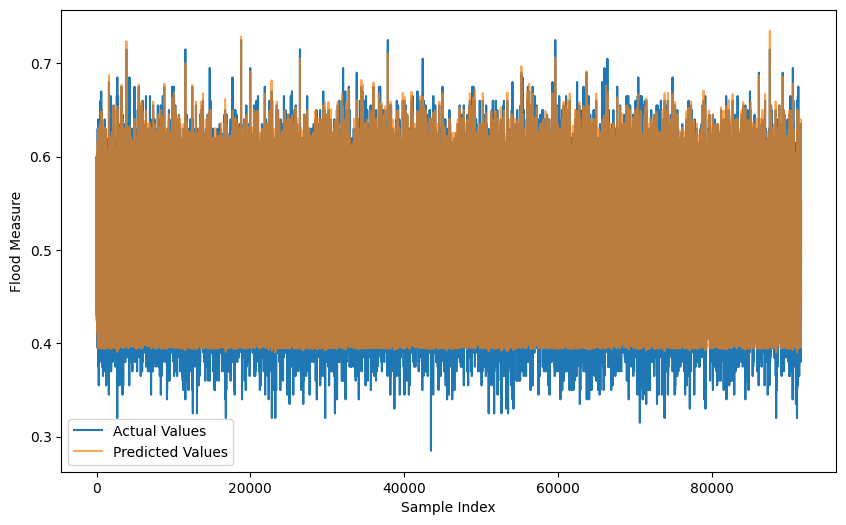

In [20]:
# Plot predictions vs. actual values
def plot_predictions(model, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            actuals.extend(labels.numpy())
            predictions.extend(outputs.numpy())

    plt.figure(figsize=(10, 6))
    plt.plot(actuals, label='Actual Values')
    plt.plot(predictions, label='Predicted Values', alpha=0.7)
    plt.xlabel('Sample Index')
    plt.ylabel('Flood Measure')
    plt.legend()
    plt.show()

plot_predictions(model, test_loader)